In [69]:
import pyreadstat
import pandas as pd
import numpy as np

from semopy import Model
from semopy.examples import multivariate_regression
from semopy import semplot
import semopy
from semopy import ModelMeans, ModelEffects
from semopy.means import estimate_means

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('cleaned_data.csv')

In [4]:
model1 = '''

#D =~ guarpr_dpc + prevote_intpresst+guarpr_rpc+envir_gwarm+envir_nuke+envir_drill+envjob_rpc+envjob_dpc+inspre_dpc+inspre_rpc+ineq_incgap_x+ineqinc_ineqreduc+econcand_rwin+econcand_dwin+immigpo_level+immigpo_jobs+immig_policy+milln_milltax_x
F =~ iran_nukeinvd+iran_nuksanct+china_econ+war_worthit+war_terror+israel_support+defsppr_dpc+defsppr_rpc

presapp_foreignstr ~ iran_nukeinvd+iran_nuksanct+china_econ+war_worthit+war_terror+israel_support+defsppr_dpc+defsppr_rpc

#latent_dom, latent_for =~ prevote_intpreswho

#prevote_intpresst ~ guarpr_dpc + guarpr_rpc+envir_gwarm+envir_nuke+envir_drill+envjob_rpc+envjob_dpc+inspre_dpc+inspre_rpc+ineq_incgap_x+ineqinc_ineqreduc+econcand_rwin+econcand_dwin+immigpo_level+immigpo_jobs+immig_policy+milln_milltax_x + presapp_foreignstr+iran_nukeinvd+iran_nuksanct+china_econ+war_worthit+war_terror+israel_support+defsppr_dpc+defsppr_rpc
'''

In [5]:
df_demo = df[df["prevote_intpreswho"] == 1]
df_rep = df[df["prevote_intpreswho"] == 2]

In [6]:
semModel = Model(model1)
semModel.fit(df)
semModel.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,iran_nukeinvd,~,F,1.000000,-,-,-
1,iran_nuksanct,~,F,1.427681,0.033083,43.155113,0.0
2,china_econ,~,F,1.038007,0.027121,38.272688,0.0
3,war_worthit,~,F,0.088225,0.012398,7.115996,0.0
4,war_terror,~,F,0.025716,0.016032,1.604058,0.108701
5,israel_support,~,F,1.143653,0.028108,40.687904,0.0
6,defsppr_dpc,~,F,0.166230,0.037007,4.49185,0.000007
7,defsppr_rpc,~,F,0.418315,0.043633,9.587156,0.0
8,presapp_foreignstr,~,iran_nukeinvd,-0.008234,0.010002,-0.82324,0.410372
9,presapp_foreignstr,~,iran_nuksanct,0.062358,0.009601,6.495188,0.0


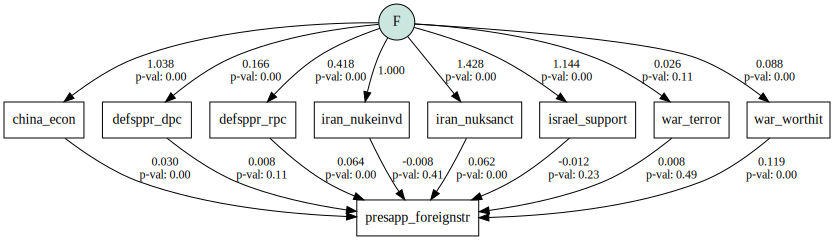

In [7]:
semplot(semModel,"model.png",plot_covs=True)

In [8]:
model2 = '''

D =~ guarpr_dpc + prevote_intpresst+guarpr_rpc+envir_gwarm+envir_nuke+envir_drill+envjob_rpc+envjob_dpc+inspre_dpc+inspre_rpc+ineq_incgap_x+ineqinc_ineqreduc+econcand_rwin+econcand_dwin+immigpo_level+immigpo_jobs+immig_policy+milln_milltax_x
F =~ iran_nukeinvd+iran_nuksanct+china_econ+war_worthit+war_terror+israel_support+defsppr_dpc+defsppr_rpc+prevote_intpresst

#presapp_foreignstr ~ iran_nukeinvd+iran_nuksanct+china_econ+war_worthit+war_terror+israel_support+defsppr_dpc+defsppr_rpc

#latent_dom, latent_for =~ prevote_intpresst

prevote_intpresst ~ guarpr_dpc + guarpr_rpc+envir_gwarm+envir_nuke+envir_drill+envjob_rpc+envjob_dpc+inspre_dpc+inspre_rpc+ineq_incgap_x+ineqinc_ineqreduc+econcand_rwin+econcand_dwin+immigpo_level+immigpo_jobs+immig_policy+milln_milltax_x + presapp_foreignstr+iran_nukeinvd+iran_nuksanct+china_econ+war_worthit+war_terror+israel_support+defsppr_dpc+defsppr_rpc
'''

In [9]:
semModel = Model(model2)
semModel.fit(df_demo)
semModel.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,guarpr_dpc,~,D,1.000000,-,-,-
1,guarpr_rpc,~,D,-9.664510,10.527378,-0.918036,0.3586
2,envir_gwarm,~,D,-1.734206,1.911561,-0.90722,0.364291
3,envir_nuke,~,D,-2.506157,2.770593,-0.904556,0.365701
4,envir_drill,~,D,-1.858882,2.110774,-0.880664,0.3785
...,...,...,...,...,...,...,...
77,envjob_rpc,~~,envjob_rpc,4.409275,0.122097,36.11285,0.0
78,D,~~,D,0.000862,0.001863,0.462542,0.643693
79,D,~~,F,-0.017436,0.01886,-0.924524,0.355214
80,F,~~,F,0.379766,0.023822,15.941906,0.0


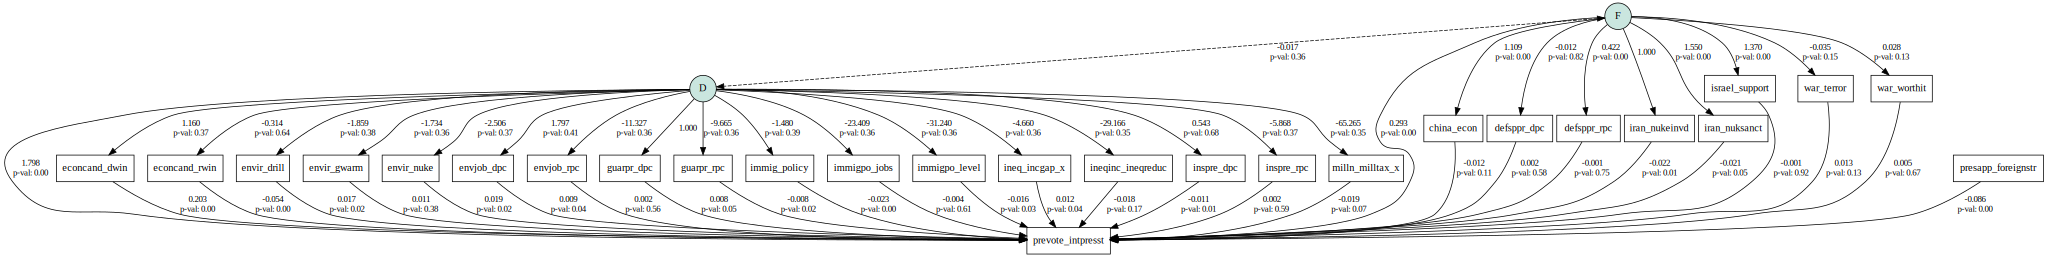

In [10]:
semplot(semModel,"model.png",plot_covs=True)

In [11]:
semModel = Model(model1)
semModel.fit(df_rep)
semModel.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,iran_nukeinvd,~,F,1.000000,-,-,-
1,iran_nuksanct,~,F,1.313801,0.053788,24.425532,0.0
2,china_econ,~,F,0.885392,0.041628,21.268967,0.0
3,war_worthit,~,F,0.046242,0.023205,1.99274,0.04629
4,war_terror,~,F,-0.020283,0.028381,-0.71466,0.474819
5,israel_support,~,F,0.926103,0.042572,21.753715,0.0
6,defsppr_dpc,~,F,-0.037190,0.061756,-0.602211,0.547034
7,defsppr_rpc,~,F,0.066853,0.054062,1.236603,0.216234
8,presapp_foreignstr,~,iran_nukeinvd,0.041020,0.015147,2.708141,0.006766
9,presapp_foreignstr,~,iran_nuksanct,0.055199,0.016245,3.397868,0.000679


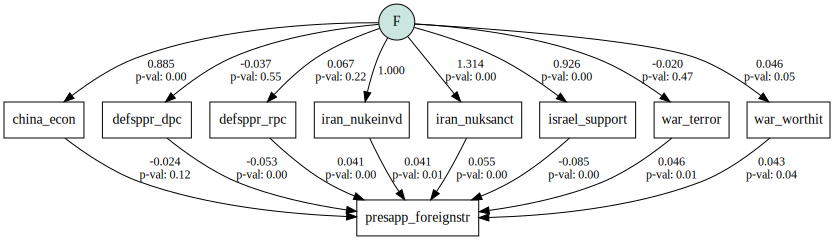

In [12]:
semplot(semModel,"model.png",plot_covs=True)

In [13]:
df = pd.read_csv('data.csv', low_memory=False)

In [14]:
df = df[df['prevote_intpresst'] > 0]

In [15]:
features = ['prevote_intpres',
 'prevote_intpreswho',
 'prevote_intpreswho_oth',
 'prevote_intpresst',
 'candaff_angdpcoft',
 'candaff_hpdpcoft',
 'candaff_afrdpcoft',
 'candaff_prddpcoft',
 'candaff_angrpcoft',
 'candaff_hprpcoft',
 'candaff_afrrpcoft',
 'candaff_prdrpcoft',
 'ctrait_dpcmoral',
 'ctrait_dpclead',
 'ctrait_dpccare',
 'ctrait_dpcknow',
 'ctrait_dpcint',
 'ctrait_dpchonst',
 'ctrait_rpcmoral',
 'ctrait_rpclead',
 'ctrait_rpccare',
 'ctrait_rpcknow',
 'ctrait_rpcint',
 'ctrait_rpchonst']

In [16]:
trait = [ 'ctrait_dpcmoral',
 'ctrait_dpclead',
 'ctrait_dpccare',
 'ctrait_dpcknow',
 'ctrait_dpcint',
 'ctrait_dpchonst',
 'ctrait_rpcmoral',
 'ctrait_rpclead',
 'ctrait_rpccare',
 'ctrait_rpcknow',
 'ctrait_rpcint',
 'ctrait_rpchonst']

In [17]:
df[trait]

,ctrait_dpcmoral,ctrait_dpclead,ctrait_dpccare,ctrait_dpcknow,ctrait_dpcint,ctrait_dpchonst,ctrait_rpcmoral,ctrait_rpclead,ctrait_rpccare,ctrait_rpcknow,ctrait_rpcint,ctrait_rpchonst
0,-8.0,1.0,-8.0,-8.0,2.0,2.0,5.0,5.0,2.0,5.0,4.0,3.0
1,2.0,2.0,1.0,2.0,1.0,2.0,3.0,5.0,5.0,3.0,3.0,5.0
2,1.0,1.0,1.0,1.0,1.0,1.0,5.0,4.0,5.0,3.0,2.0,4.0
3,1.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,5.0,3.0,5.0,4.0
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5908,2.0,3.0,2.0,2.0,1.0,2.0,4.0,4.0,5.0,3.0,3.0,4.0
5910,2.0,3.0,1.0,1.0,1.0,2.0,5.0,4.0,5.0,5.0,4.0,5.0
5911,4.0,1.0,3.0,3.0,2.0,3.0,5.0,5.0,5.0,4.0,4.0,5.0
5912,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0


In [18]:
df[trait] = df[trait] * -1

In [19]:
df[trait] = df[trait].replace({
    -5:1,
    -4:2,
    -3:3,
    -2:4,
    -1:5,
    8:-8,
    9:-9
})

In [20]:
df[trait]

,ctrait_dpcmoral,ctrait_dpclead,ctrait_dpccare,ctrait_dpcknow,ctrait_dpcint,ctrait_dpchonst,ctrait_rpcmoral,ctrait_rpclead,ctrait_rpccare,ctrait_rpcknow,ctrait_rpcint,ctrait_rpchonst
0,-8.0,5.0,-8.0,-8.0,4.0,4.0,1.0,1.0,4.0,1.0,2.0,3.0
1,4.0,4.0,5.0,4.0,5.0,4.0,3.0,1.0,1.0,3.0,3.0,1.0
2,5.0,5.0,5.0,5.0,5.0,5.0,1.0,2.0,1.0,3.0,4.0,2.0
3,5.0,5.0,5.0,5.0,4.0,5.0,3.0,3.0,1.0,3.0,1.0,2.0
4,5.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5908,4.0,3.0,4.0,4.0,5.0,4.0,2.0,2.0,1.0,3.0,3.0,2.0
5910,4.0,3.0,5.0,5.0,5.0,4.0,1.0,2.0,1.0,1.0,2.0,1.0
5911,2.0,5.0,3.0,3.0,4.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0
5912,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0


In [21]:
df['prevote_intpresst'] = df['prevote_intpresst'].replace({2:0})

In [22]:
linear_model = sm.OLS(df['prevote_intpresst'], df[features[4:]]).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      prevote_intpresst   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              822.7
Date:                Wed, 10 Nov 2021   Prob (F-statistic):                        0.00
Time:                        21:13:45   Log-Likelihood:                         -2491.3
No. Observations:                4532   AIC:                                      5023.
Df Residuals:                    4512   BIC:                                      5151.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
candaff_angdpcoft    -0.0059      0.003     -1.727      0.084      -0.013       0.001
candaff_hpdpcoft     -0.0204      0.004     -4.974      0.000      -0.028      -0.012
candaff_afrdpcoft     0.0179      0.004      4.315      0.000       0.010       0.026
candaff_prddpcoft    -0.0186      0.004     -4.491      0.000      -0.027      -0.010
candaff_angrpcoft    -0.0053      0.004     -1.472      0.141      -0.012       0.002
candaff_hprpcoft     -0.0054      0.004     -1.231      0.219      -0.014       0.003
candaff_afrrpcoft    -0.0046      0.004     -1.226      0.220      -0.012       0.003
candaff_prdrpcoft     0.0183      0.004      4.078      0.000       0.009       0.027
ctrait_dpcmoral      -0.0086      0.006     -1.472      0.141      -0.020       0.003
ctrait_dpclead        0.0067      0.008      0.874      0.382      -0.008       0.022
ctrait_dpccare        0.0494      0.008      6.156      0.000       0.034       0.065
ctrait_dpcknow        0.0279      0.009      3.280      0.001       0.011       0.045
ctrait_dpcint         0.0832      0.007     11.153      0.000       0.069       0.098
ctrait_dpchonst       0.0344      0.008      4.437      0.000       0.019       0.050
ctrait_rpcmoral       0.0049      0.005      0.984      0.325      -0.005       0.015
ctrait_rpclead        0.0068      0.006      1.145      0.252      -0.005       0.018
ctrait_rpccare        0.0357      0.007      5.462      0.000       0.023       0.048
ctrait_rpcknow        0.0092      0.007      1.287      0.198      -0.005       0.023
ctrait_rpcint         0.0069      0.006      1.084      0.278      -0.006       0.019
ctrait_rpchonst       0.0007      0.006      0.126      0.900      -0.011       0.012
==============================================================================
Omnibus:                      562.355   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5177.162
Skew:                          -0.239   Prob(JB):                         0.00
Kurtosis:                       8.214   Cond. No.                         18.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model1 = '''
#latent definition
trait_latent,affect_latent =~ prevote_intpresst

trait_latent ~ ctrait_rpcmoral + ctrait_rpclead + ctrait_rpccare +\
                ctrait_rpcknow + ctrait_rpcint + ctrait_rpchonst
affect_latent ~ candaff_angrpcoft + candaff_hprpcoft +candaff_afrrpcoft + candaff_prdrpcoft
'''

In [24]:
# df1 = df[df['prevote_intpreswho'] == 2]

In [25]:
semModel = ModelMeans(model1)
semModel.fit(df)
semModel.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,trait_latent,~,ctrait_rpcmoral,-0.019901,0.0047,-4.234668,0.000023
1,trait_latent,~,ctrait_rpclead,-0.005942,0.005901,-1.006833,0.314015
2,trait_latent,~,ctrait_rpccare,-0.000264,0.006393,-0.041276,0.967076
3,trait_latent,~,ctrait_rpcknow,0.000553,0.007006,0.078981,0.937048
4,trait_latent,~,ctrait_rpcint,0.014633,0.006198,2.360877,0.018232
5,trait_latent,~,ctrait_rpchonst,0.006091,0.005612,1.085345,0.277769
6,affect_latent,~,candaff_angrpcoft,-0.020119,0.003464,-5.808221,0.0
7,affect_latent,~,candaff_hprpcoft,-0.028207,0.004091,-6.894558,0.0
8,affect_latent,~,candaff_afrrpcoft,-0.014262,0.003637,-3.921686,0.000088
9,affect_latent,~,candaff_prdrpcoft,0.002370,0.004386,0.540259,0.589019


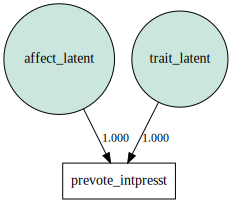

In [26]:
semplot(semModel,"model.png",plot_covs=True)

In [27]:
df['morality'] = df['ctrait_rpcmoral']
df['leadership'] = df['ctrait_rpclead']
df['caring'] = df['ctrait_rpccare']
df['knowledgable'] = df['ctrait_rpcknow']
df['intelligent'] = df['ctrait_rpcint']
df['honest'] = df['ctrait_rpchonst']

df['angry'] = df['candaff_angrpcoft']
df['hopeful'] = df['candaff_hprpcoft']
df['afraid'] = df['candaff_afrrpcoft']
df['proud'] = df['candaff_prdrpcoft']

df['voting_intention'] = df['prevote_intpresst']

In [149]:
model3 = '''
#latent definition
trait_latent =~ morality + leadership + caring + knowledgable + intelligent + honest
affect_latent =~ angry + hopeful + afraid + proud

#structure
voting_intention ~ morality + leadership + caring + knowledgable + intelligent + honest + angry + hopeful + afraid + proud
                    
trait_latent, affect_latent ~ voting_intention

DEFINE(ordinal) morality leadership caring knowledgable intelligent honest angry hopeful afraid proud voting_intention

'''

In [153]:
train = df[df['prevote_intpreswho'] == 2]

In [145]:
df['voting_intention'].value_counts()

1.0    3702
0.0     830
Name: voting_intention, dtype: int64

In [154]:
semModel2 = Model(model3)
semModel2.fit(train)
semModel2.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,morality,~,trait_latent,1.000000,-,-,-
1,leadership,~,trait_latent,1.115032,0.035074,31.790509,0.0
2,caring,~,trait_latent,1.006719,0.029063,34.638895,0.0
3,knowledgable,~,trait_latent,0.035753,0.152626,0.234255,0.814787
4,intelligent,~,trait_latent,1.181563,0.054302,21.758968,0.0
5,honest,~,trait_latent,1.087058,0.029696,36.606814,0.0
6,angry,~,affect_latent,1.000000,-,-,-
7,hopeful,~,affect_latent,0.130463,0.042623,3.060856,0.002207
8,afraid,~,affect_latent,1.211323,0.079472,15.242158,0.0
9,proud,~,affect_latent,-0.079572,0.043417,-1.832733,0.066842


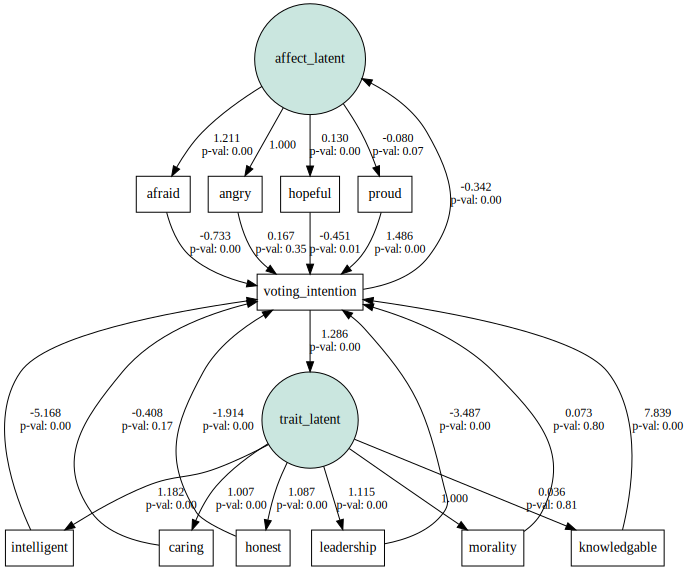

In [155]:
semplot(semModel2,"model2.png",plot_covs=True)

In [156]:
semModel2.predict_factors(train).value_counts()

affect_latent  trait_latent
0.0            0.0             1724
dtype: int64

In [157]:
df3 = pd.DataFrame(
    {'predict': semModel2.predict(df2)['voting_intention'].reset_index(drop = True),
    'labels': test['voting_intention'].reset_index(drop = True)}
)

In [158]:
s = semModel2.predict(df2)['voting_intention']

In [159]:
for b in range(-100, 100, 1):
    print(accuracy_score(( s > b/100) * 1, 
                         test['voting_intention'].reset_index(drop = True)),
         b)

0.7859007832898173 -100
0.7859007832898173 -99
0.7859007832898173 -98
0.7852480417754569 -97
0.7852480417754569 -96
0.7852480417754569 -95
0.7852480417754569 -94
0.7852480417754569 -93
0.7852480417754569 -92
0.7852480417754569 -91
0.7852480417754569 -90
0.7839425587467362 -89
0.7839425587467362 -88
0.7839425587467362 -87
0.7839425587467362 -86
0.7839425587467362 -85
0.7839425587467362 -84
0.7845953002610966 -83
0.7845953002610966 -82
0.7852480417754569 -81
0.7852480417754569 -80
0.7852480417754569 -79
0.783289817232376 -78
0.7826370757180157 -77
0.7819843342036553 -76
0.7806788511749347 -75
0.7800261096605744 -74
0.7800261096605744 -73
0.7800261096605744 -72
0.7800261096605744 -71
0.779373368146214 -70
0.779373368146214 -69
0.779373368146214 -68
0.779373368146214 -67
0.7761096605744126 -66
0.7754569190600522 -65
0.7741514360313316 -64
0.7741514360313316 -63
0.7715404699738904 -62
0.7715404699738904 -61
0.7715404699738904 -60
0.77088772845953 -59
0.77088772845953 -58
0.7702349869451697 

In [35]:
features = 'morality leadership caring knowledgable intelligent honest angry hopeful afraid proud'.split()
features

['morality',
 'leadership',
 'caring',
 'knowledgable',
 'intelligent',
 'honest',
 'angry',
 'hopeful',
 'afraid',
 'proud']

In [36]:
lr = LogisticRegression()
lr.fit(df[features], df['voting_intention'])
lr.score(df[features], df['voting_intention'])

0.8166372462488968

In [37]:
sm.OLS(df['voting_intention'],df[features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       voting_intention   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.680
Method:                 Least Squares   F-statistic:                              962.1
Date:                Wed, 10 Nov 2021   Prob (F-statistic):                        0.00
Time:                        21:14:08   Log-Likelihood:                         -3388.4
No. Observations:                4532   AIC:                                      6797.
Df Residuals:                    4522   BIC:                                      6861.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
morality         0.0177      0.006      3.095      0.002       0.007       0.029
leadership       0.0198      0.007      2.749      0.006       0.006       0.034
caring           0.0304      0.008      3.893      0.000       0.015       0.046
knowledgable     0.0698      0.008      8.324      0.000       0.053       0.086
intelligent      0.0849      0.007     11.599      0.000       0.071       0.099
honest           0.0133      0.007      1.940      0.052      -0.000       0.027
angry            0.0339      0.004      8.167      0.000       0.026       0.042
hopeful         -0.0544      0.005    -10.937      0.000      -0.064      -0.045
afraid           0.0200      0.004      4.516      0.000       0.011       0.029
proud           -0.0337      0.005     -6.478      0.000      -0.044      -0.024
==============================================================================
Omnibus:                      580.300   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5381.101
Skew:                           0.268   Prob(JB):                         0.00
Kurtosis:                       8.311   Cond. No.                         9.90
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

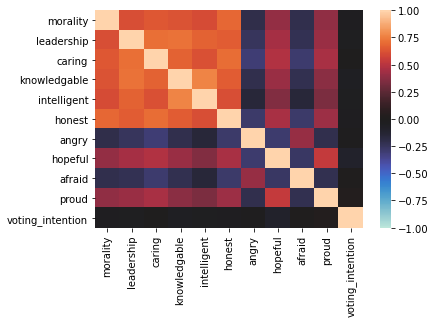

In [38]:
sns.heatmap(df[features + ['voting_intention']].corr(),
           vmax=1, vmin=-1, center=0)

In [39]:
pd.Series(lr.predict(test[features]) > 0.5).value_counts()

NameError: name 'test' is not defined

In [41]:
semopy.efa.explore_cfa_model(train[features]).split('\n')

NameError: name 'train' is not defined

In [162]:
model3 = '''

trait_latent, affect_latent =~ voting_intention
trait_latent ~ morality + leadership + caring + knowledgable + intelligent + honest
affect_latent ~ angry + hopeful + afraid + proud
'''

In [163]:
train = df.iloc[:3000, :].copy()
test = df.iloc[3000:, :].copy()

In [164]:
semModel2 = Model(model3)
semModel2.fit(train)
semModel2.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,trait_latent,~,morality,-0.004046,0.004458,-0.907482,0.364152
1,trait_latent,~,leadership,-0.004874,0.005736,-0.849706,0.395489
2,trait_latent,~,caring,0.018497,0.006258,2.955871,0.003118
3,trait_latent,~,knowledgable,-0.007815,0.006941,-1.125834,0.260236
4,trait_latent,~,intelligent,-0.002068,0.006055,-0.341501,0.732726
5,trait_latent,~,honest,-0.003897,0.005433,-0.717212,0.473243
6,affect_latent,~,angry,-0.007211,0.003711,-1.943117,0.052002
7,affect_latent,~,hopeful,-0.032717,0.004405,-7.427695,0.0
8,affect_latent,~,afraid,0.001266,0.00397,0.31882,0.749863
9,affect_latent,~,proud,0.022070,0.004735,4.661488,0.000003


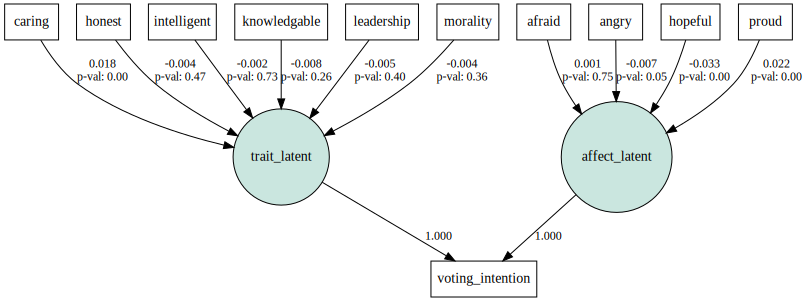

In [165]:
semplot(semModel2,"model2.png",plot_covs=True)

In [46]:
test['voting_intention'].value_counts()

1.0    1211
0.0     321
Name: voting_intention, dtype: int64

In [ ]:
df2 = test.copy()
df2['voting_intention'] = np.nan

In [87]:
df3 = pd.DataFrame(
    {'predict': semModel2.predict(df2)['voting_intention'].reset_index(drop = True),
    'labels': test['voting_intention'].reset_index(drop = True)}
)
df3

,predict,labels
0,-0.010434,1.0
1,-0.094321,1.0
2,-0.034987,1.0
3,-0.052931,1.0
4,-0.006566,0.0
...,...,...
1527,-0.043971,1.0
1528,-0.012386,1.0
1529,0.002509,1.0
1530,-0.159294,1.0


<AxesSubplot:xlabel='labels', ylabel='predict'>

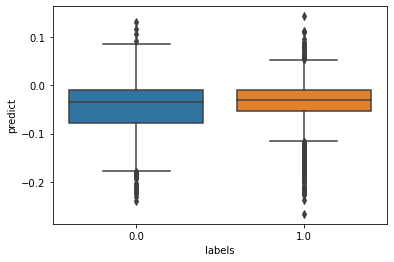

In [90]:
sns.boxplot(data = df3, y = 'predict', x = 'labels')

In [93]:
for b in range(-100, 100, 1):
    print(accuracy_score((semModel2.predict(df2)['voting_intention'] > b/100) * 1, 
                         test['voting_intention'].reset_index(drop = True)),
         b)

0.7904699738903395 -100
0.7904699738903395 -99
0.7904699738903395 -98
0.7904699738903395 -97
0.7904699738903395 -96
0.7904699738903395 -95
0.7904699738903395 -94
0.7904699738903395 -93
0.7904699738903395 -92
0.7904699738903395 -91
0.7904699738903395 -90
0.7904699738903395 -89
0.7904699738903395 -88
0.7904699738903395 -87
0.7904699738903395 -86
0.7904699738903395 -85
0.7904699738903395 -84
0.7904699738903395 -83
0.7904699738903395 -82
0.7904699738903395 -81
0.7904699738903395 -80
0.7904699738903395 -79
0.7904699738903395 -78
0.7904699738903395 -77
0.7904699738903395 -76
0.7904699738903395 -75
0.7904699738903395 -74
0.7904699738903395 -73
0.7904699738903395 -72
0.7904699738903395 -71
0.7904699738903395 -70
0.7904699738903395 -69
0.7904699738903395 -68
0.7904699738903395 -67
0.7904699738903395 -66
0.7904699738903395 -65
0.7904699738903395 -64
0.7904699738903395 -63
0.7904699738903395 -62
0.7904699738903395 -61
0.7904699738903395 -60
0.7904699738903395 -59
0.7904699738903395 -58
0.79046997

In [60]:
lr = LogisticRegression()
lr.fit(train[features], train['voting_intention'])
lr.score(test[features], test['voting_intention'])

0.7904699738903395

In [61]:
train[features + ['voting_intention']].to_csv('train_data.csv')

PermissionError: [Errno 13] Permission denied: 'train_data.csv'

In [51]:
test[features + ['voting_intention']].to_csv('test_data.csv')

PermissionError: [Errno 13] Permission denied: 'test_data.csv'

In [62]:
pd.Series(lr.coef_[0], index = features)

morality       -0.032999
leadership     -0.032239
caring          0.123234
knowledgable   -0.059691
intelligent    -0.022093
honest         -0.032887
angry          -0.052809
hopeful        -0.202507
afraid          0.007149
proud           0.144494
dtype: float64

In [ ]:
lr = LogisticRegression()
lr.fit(semModel2.predict_factors(train), train['voting_intention'])
lr.score(semModel2.predict_factors(test), test['voting_intention'])

In [58]:
pd.concat([semModel2.predict_factors(train), train['voting_intention'].reset_index(drop=True)], axis=1).to_csv('transformed_train.csv')

In [57]:
train['voting_intention'][8]

1.0

In [267]:
pd.concat([semModel2.predict_factors(test), test['voting_intention']], axis=1).to_csv('transformed_test.csv')

In [261]:
pd.Series(lr.coef_[0], index = ['affect_latent', 'trait_latent'])

affect_latent    11.385395
trait_latent     10.772515
dtype: float64

In [237]:
sm.OLS(test['voting_intention'].reset_index(drop=True),semModel2.predict_factors(test)['trait_latent']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       voting_intention   R-squared (uncentered):                   0.203
Model:                            OLS   Adj. R-squared (uncentered):              0.203
Method:                 Least Squares   F-statistic:                              263.4
Date:                Wed, 10 Nov 2021   Prob (F-statistic):                    6.37e-53
Time:                        19:48:40   Log-Likelihood:                         -1229.6
No. Observations:                1032   AIC:                                      2461.
Df Residuals:                    1031   BIC:                                      2466.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
trait_latent     3.4345      0.212     16.229      0.000       3.019       3.850
==============================================================================
Omnibus:                      213.251   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.376
Skew:                           1.462   Prob(JB):                     1.02e-80
Kurtosis:                       3.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
sm.OLS(test['voting_intention'].reset_index(drop=True),semModel2.predict_factors(test)['affect_latent']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       voting_intention   R-squared (uncentered):                   0.203
Model:                            OLS   Adj. R-squared (uncentered):              0.203
Method:                 Least Squares   F-statistic:                              263.4
Date:                Wed, 10 Nov 2021   Prob (F-statistic):                    6.37e-53
Time:                        19:31:07   Log-Likelihood:                         -1229.6
No. Observations:                1032   AIC:                                      2461.
Df Residuals:                    1031   BIC:                                      2466.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
affect_latent     3.2694      0.201     16.229      0.000       2.874       3.665
==============================================================================
Omnibus:                      221.295   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              388.496
Skew:                           1.499   Prob(JB):                     4.36e-85
Kurtosis:                       3.221   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
sm.OLS(test['voting_intention'].reset_index(drop=True),semModel2.predict_factors(test)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       voting_intention   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          2.244e+04
Date:                Wed, 10 Nov 2021   Prob (F-statistic):                        0.00
Time:                        19:31:08   Log-Likelihood:                          612.39
No. Observations:                1032   AIC:                                     -1221.
Df Residuals:                    1030   BIC:                                     -1211.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
affect_latent -7.929e+14   4.15e+12   -191.229      0.000   -8.01e+14   -7.85e+14
trait_latent   8.329e+14   4.36e+12    191.229      0.000    8.24e+14    8.41e+14
==============================================================================
Omnibus:                      215.686   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.438
Skew:                          -1.473   Prob(JB):                     4.92e-82
Kurtosis:                       3.170   Cond. No.                     2.45e+14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.95e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [206]:
stats = semopy.calc_stats(semModel2)
print(stats.T)

                      Value
DoF            5.300000e+01
DoF Baseline   6.500000e+01
chi2           2.497396e-04
chi2 p-value   1.000000e+00
chi2 Baseline  8.603912e+03
CFI            1.006207e+00
GFI            1.000000e+00
AGFI           1.000000e+00
NFI            1.000000e+00
TLI            1.007612e+00
RMSEA          0.000000e+00
AIC            2.600000e+01
BIC            9.881173e+01
LogLik         1.248698e-07


In [207]:
plt.boxplot(semModel2.predict(test)['prevote_intpresst'])

KeyError: 'prevote_intpresst'

In [ ]:
s = (semModel2.predict(test)['prevote_intpresst'] >= 0.5) * 1
s.value_counts()

In [ ]:
df2['prevote_intpresst'].iloc[1500:].value_counts()

In [ ]:
features = 'ctrait_rpcmoral ctrait_rpclead ctrait_rpccare ctrait_rpcknow ctrait_rpcint ctrait_rpchonst candaff_angrpcoft candaff_hprpcoft candaff_afrrpcoft candaff_prdrpcoft'.split()
features

In [ ]:
lr = LinearRegression()
lr.fit(train[features], train['prevote_intpresst'])

In [ ]:
pd.Series(lr.predict(test[features]) > 0.5).value_counts()

In [160]:
semopy.efa.explore_cfa_model(train[features + ['prevote_intpresst']]).split('\n')

['eta1 =~ knowledgable + caring + leadership + intelligent + honest + morality',
 'eta2 =~ proud + hopeful',
 'eta3 =~ caring + honest + angry + afraid + hopeful',
 '']